### Types of restaurants around the Perth Metropolitan Area

In [1]:
#dependencies et al.
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
import scipy.stats as st
import time



In [2]:
# Bring in Summary Dataframe "socio_demographic_restaurant_data.csv"
load_csv = "../Outputs/socio_demographic_restaurant_data.csv"
summary_df = pd.read_csv(load_csv)
summary_df.dropna
summary_df.head()

,Postcode,Suburb,Suburb sqkm,Median House Price,Median Age (Persons),Median Mortgage Repayments (Monthly),Median Total Personal Income (Weekly),Median Rent (Weekly),Median Total Family Income (Weekly),Average Number of Persons per Bedroom,...,Number of restaurants,Minimum Rating,Maximum Rating,Average Rating of restaurants,Total Number of Reviews,Average Number of Reviews,Minimum Price Level,Maximum Price Level,Average Price Level,Restaurant Density
0,6064,Alexander Heights,3.1816,453285,37,1800,625,390,1704,0.8,...,24.0,3.4,4.8,4.179167,4189.0,174.541667,1.0,2.0,0.708333,7.543374
1,6154,Alfred Cove,1.0566,840087,39,2420,852,443,2542,0.8,...,54.0,0.0,5.0,4.268519,12506.0,231.592593,1.0,2.0,1.185185,51.107325
2,6038,Alkimos,17.1744,413750,28,2249,930,360,2094,0.7,...,6.0,3.3,4.6,4.133333,1354.0,225.666667,2.0,2.0,0.666667,0.349357
3,6167,Anketell,6.8220,1008763,45,1733,641,420,1958,0.8,...,60.0,3.5,4.6,4.126667,19010.0,316.833333,1.0,2.0,1.416667,8.795075
4,6153,Applecross,3.1954,1376690,43,2916,954,460,2764,0.7,...,60.0,3.5,4.8,4.305000,17894.0,298.233333,1.0,3.0,1.350000,18.776992


In [3]:
# Check the list of Column
list(summary_df.columns.values)

['Postcode',
 'Suburb',
 'Suburb sqkm',
 'Median House Price',
 'Median Age (Persons)',
 'Median Mortgage Repayments (Monthly)',
 'Median Total Personal Income (Weekly)',
 'Median Rent (Weekly)',
 'Median Total Family Income (Weekly)',
 'Average Number of Persons per Bedroom',
 'Median Total Household Income (Weekly)',
 'Average Household Size',
 'People (0-14 year)',
 'People (15-24 year)',
 'People (25-34 year)',
 'People (35-44 year)',
 'People (45-54 year)',
 'People (55-64 year)',
 'People (65-74 year)',
 'People (75-84 year)',
 'People (85 and over year)',
 'Total Number of People',
 'Unemployment Rate (%)',
 'Number of restaurants',
 'Minimum Rating',
 'Maximum Rating',
 'Average Rating of restaurants',
 'Total Number of Reviews',
 'Average Number of Reviews',
 'Minimum Price Level',
 'Maximum Price Level',
 'Average Price Level',
 'Restaurant Density']

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


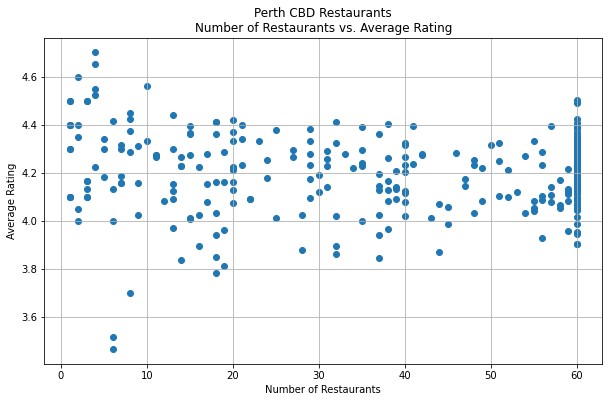

<Figure size 720x432 with 0 Axes>

In [4]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of restaurants"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Number of restaurants"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Number of restaurants"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Number of restaurants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of Restaurants vs. Average Rating")
plt.xlabel("Number of Restaurants")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_restaurant_vs_mean_rating.png")

plt.figure(figsize=(10,6))
# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


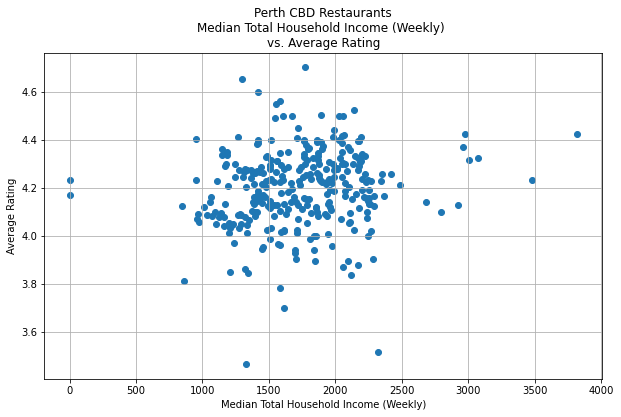

<Figure size 720x432 with 0 Axes>

In [5]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Rating")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_rating.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


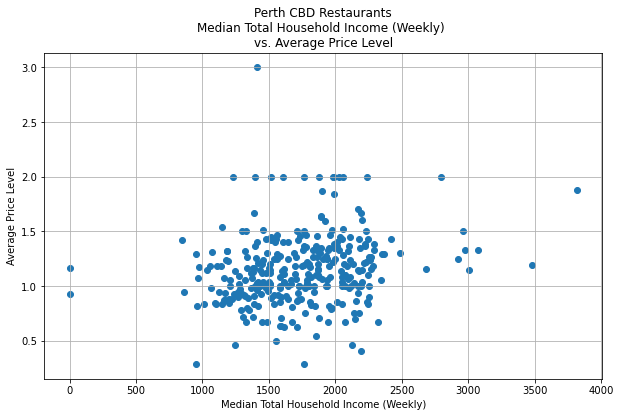

<Figure size 720x432 with 0 Axes>

In [6]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Price Level")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Price Level")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_price_level.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


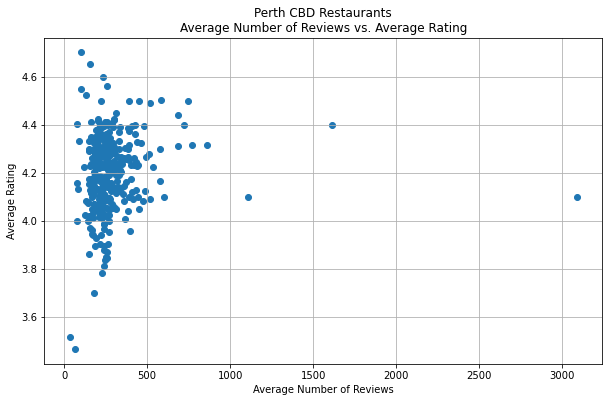

<Figure size 720x432 with 0 Axes>

In [7]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Average Number of Reviews"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Average Number of Reviews"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Average Number of Reviews"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Average Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Number of Reviews vs. Average Rating")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_num_review_vs_mean_rating.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


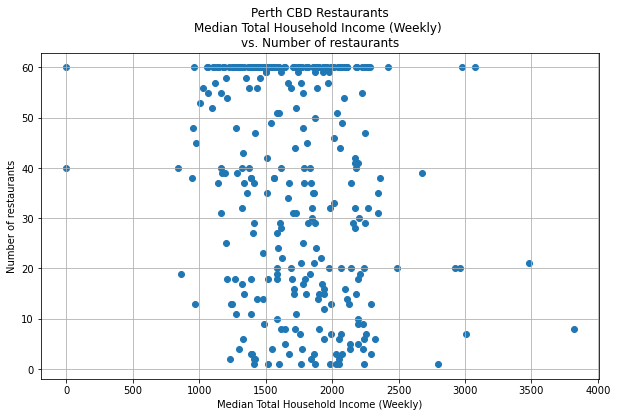

<Figure size 720x432 with 0 Axes>

In [8]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of restaurants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of restaurants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Number of restaurants")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Number of restaurants")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_num_restaurant.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


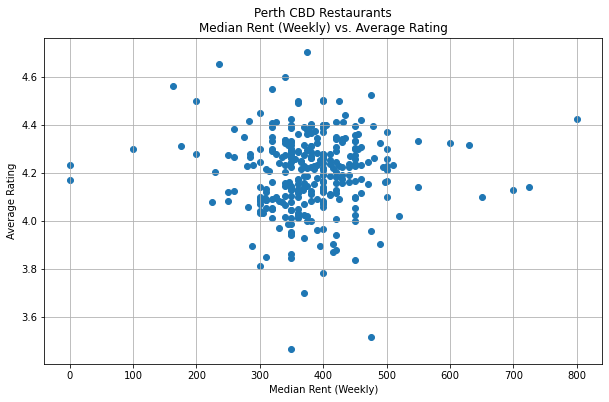

<Figure size 720x432 with 0 Axes>

In [9]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Median Rent (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Median Rent (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Rent (Weekly) vs. Average Rating")
plt.xlabel("Median Rent (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_rent_vs_mean_rating.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.73.


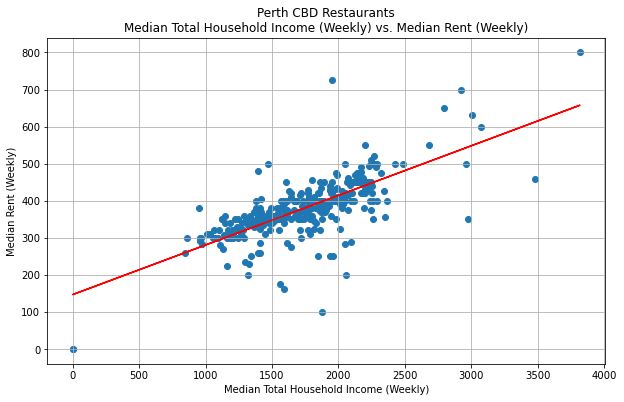

<Figure size 720x432 with 0 Axes>

In [10]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) vs. Median Rent (Weekly)")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Median Rent (Weekly)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_median_rent.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


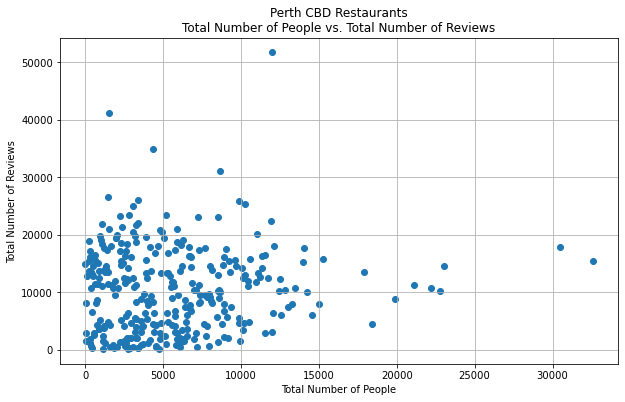

<Figure size 720x432 with 0 Axes>

In [29]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
regress_values = summary_df["Total Number of People"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
plt.plot(summary_df["Total Number of People"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nTotal Number of People vs. Total Number of Reviews")
plt.xlabel("Total Number of People")
plt.ylabel("Total Number of Reviews")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_people_vs_num_review.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


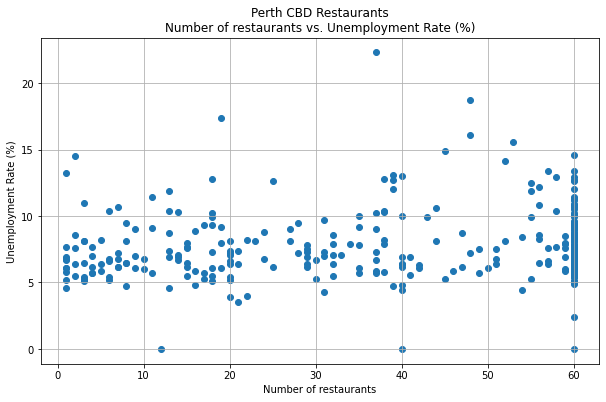

<Figure size 720x432 with 0 Axes>

In [30]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of restaurants"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Number of restaurants'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Number of restaurants"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Number of restaurants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of restaurants vs. Unemployment Rate (%)")
plt.xlabel("Number of restaurants")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Number of restaurants vsUnemployment Rate (%).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


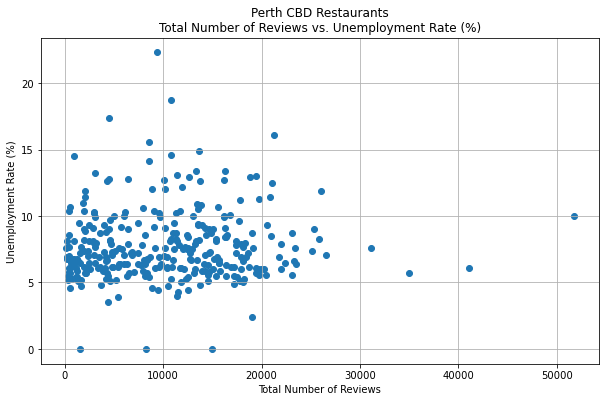

<Figure size 720x432 with 0 Axes>

In [31]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Total Number of Reviews"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Total Number of Reviews'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Total Number of Reviews"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Total Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nTotal Number of Reviews vs. Unemployment Rate (%)")
plt.xlabel("Total Number of Reviews")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Total Number of Reviews vs Unemployment Rate (%).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


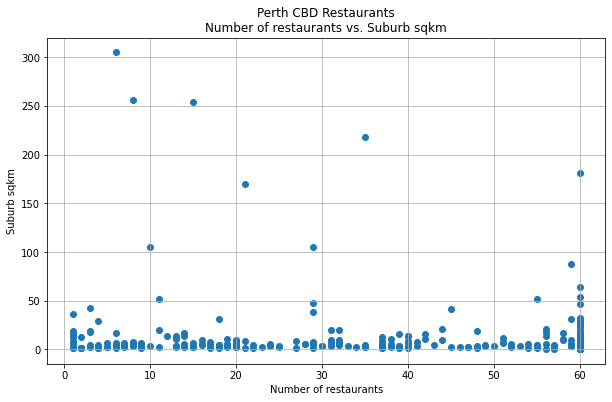

<Figure size 720x432 with 0 Axes>

In [32]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of restaurants"], summary_df["Suburb sqkm"])
regress_values = summary_df['Number of restaurants'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Number of restaurants"], summary_df["Suburb sqkm"])
plt.plot(summary_df["Number of restaurants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of restaurants vs. Suburb sqkm")
plt.xlabel("Number of restaurants")
plt.ylabel("Suburb sqkm")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Number of restaurants vs Suburb sqkm.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.37.


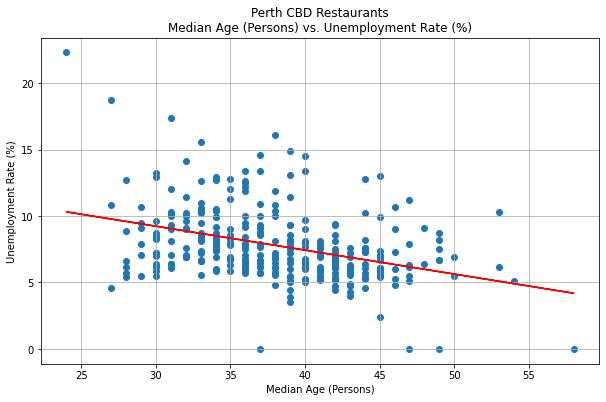

<Figure size 720x432 with 0 Axes>

In [33]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Age (Persons)"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Median Age (Persons)'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Median Age (Persons)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Age (Persons) vs. Unemployment Rate (%)")
plt.xlabel("Median Age (Persons)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Age (Persons) vs Unemployment Rate (%).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.23.


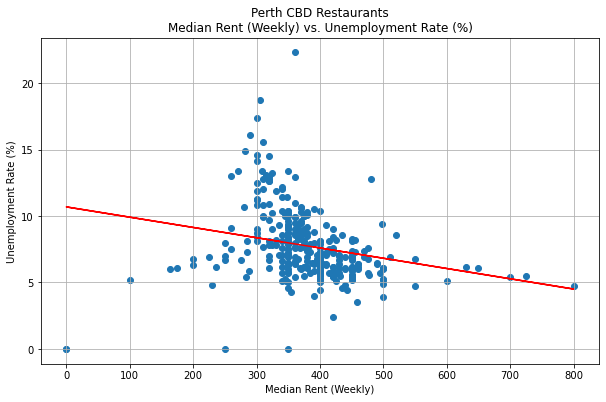

<Figure size 720x432 with 0 Axes>

In [34]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Rent (Weekly)"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Median Rent (Weekly)'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Median Rent (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Rent (Weekly) vs. Unemployment Rate (%)")
plt.xlabel("Median Rent (Weekly)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Rent (Weekly) vs Unemployment Rate (%).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


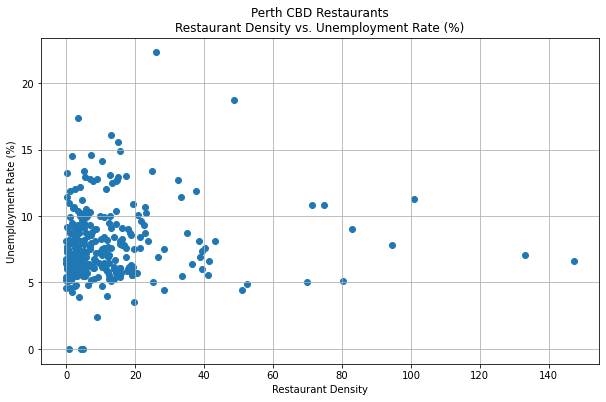

<Figure size 720x432 with 0 Axes>

In [35]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Restaurant Density"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Restaurant Density'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Restaurant Density"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Restaurant Density"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nRestaurant Density vs. Unemployment Rate (%)")
plt.xlabel("Restaurant Density")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Restaurant Density vs Unemployment Rate (%).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.3.


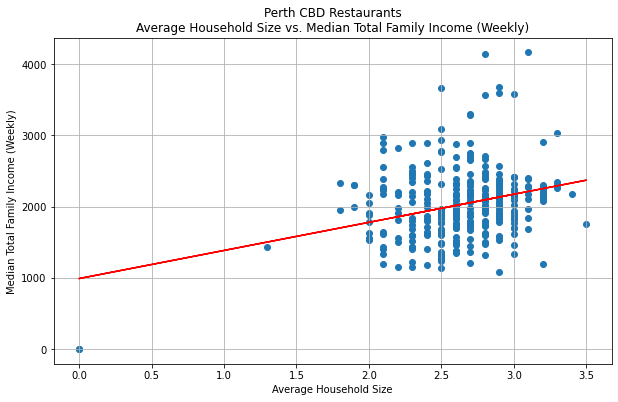

<Figure size 720x432 with 0 Axes>

In [36]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Average Household Size"], summary_df["Median Total Family Income (Weekly)"])
regress_values = summary_df['Average Household Size'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Average Household Size"], summary_df["Median Total Family Income (Weekly)"])
plt.plot(summary_df["Average Household Size"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Household Size vs. Median Total Family Income (Weekly)")
plt.xlabel("Average Household Size")
plt.ylabel("Median Total Family Income (Weekly)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Average Household Size vs Median Total Family Income (Weekly).png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


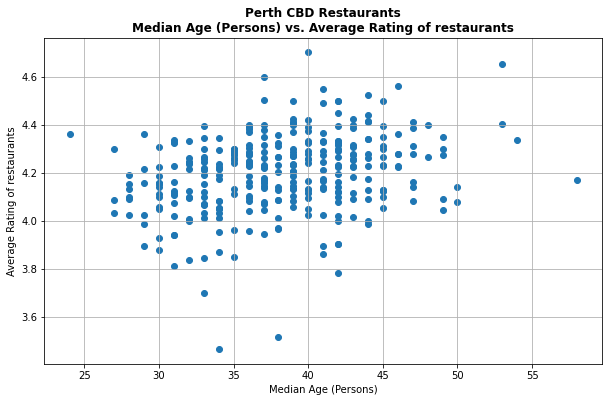

<Figure size 720x432 with 0 Axes>

In [41]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Age (Persons)"], summary_df["Average Rating of restaurants"])
regress_values = summary_df['Median Age (Persons)'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Median Age (Persons)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Age (Persons) vs. Average Rating of restaurants", fontweight = 'bold')
plt.xlabel("Median Age (Persons)")
plt.ylabel("Average Rating of restaurants")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Age (Persons) vs Average Rating of restaurants.png")
plt.figure(figsize=(10,6))

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

In [38]:
# Check the list of Column
list(summary_df.columns.values)

['Postcode',
 'Suburb',
 'Suburb sqkm',
 'Median House Price',
 'Median Age (Persons)',
 'Median Mortgage Repayments (Monthly)',
 'Median Total Personal Income (Weekly)',
 'Median Rent (Weekly)',
 'Median Total Family Income (Weekly)',
 'Average Number of Persons per Bedroom',
 'Median Total Household Income (Weekly)',
 'Average Household Size',
 'People (0-14 year)',
 'People (15-24 year)',
 'People (25-34 year)',
 'People (35-44 year)',
 'People (45-54 year)',
 'People (55-64 year)',
 'People (65-74 year)',
 'People (75-84 year)',
 'People (85 and over year)',
 'Total Number of People',
 'Unemployment Rate (%)',
 'Number of restaurants',
 'Minimum Rating',
 'Maximum Rating',
 'Average Rating of restaurants',
 'Total Number of Reviews',
 'Average Number of Reviews',
 'Minimum Price Level',
 'Maximum Price Level',
 'Average Price Level',
 'Restaurant Density']

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-value is: nan.


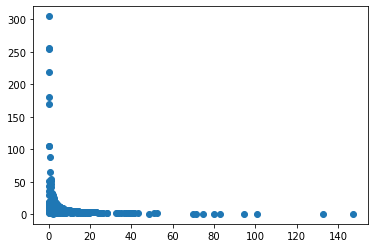

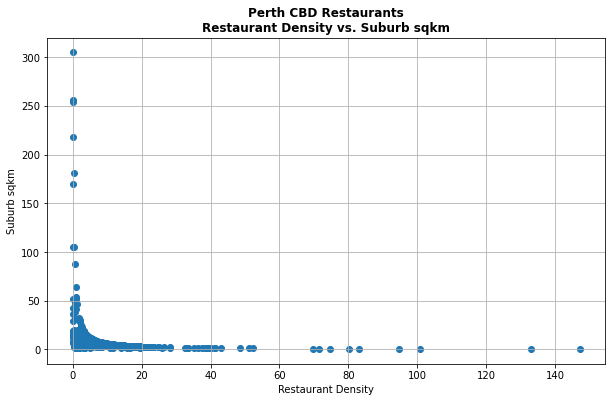

<Figure size 720x432 with 0 Axes>

In [39]:
# Linear regression
plt.scatter(summary_df["Restaurant Density"], summary_df["Suburb sqkm"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Restaurant Density"], summary_df["Suburb sqkm"])
regress_values = summary_df['Restaurant Density'] * slope + intercept

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Restaurant Density"], summary_df["Suburb sqkm"])
plt.plot(summary_df["Restaurant Density"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(("Perth CBD Restaurants\nRestaurant Density vs. Suburb sqkm"), fontweight = 'bold')
plt.xlabel("Restaurant Density")
plt.ylabel("Suburb sqkm")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Restaurant Density vs Suburb sqkm.png")

plt.figure(figsize=(10,6))
# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

In [28]:
#bring in australian_post_codes_lat_lon.csv
load_csv = "../data/australian_post_codes_lat_lon.csv"
australian_post_codes_lat_lon = pd.read_csv(load_csv)
australian_post_codes_lat_lon.head()

FileNotFoundError: [Errno 2] File ../data/australian_post_codes_lat_lon.csv does not exist: '../data/australian_post_codes_lat_lon.csv'

In [ ]:
australian_post_codes_lat_lon_a = australian_post_codes_lat_lon[(australian_post_codes_lat_lon["state"] == "WA")]

In [ ]:
heatmap = pd.merge(left = australian_post_codes_lat_lon_a["suburb"], summary_df

In [ ]:
# australian_post_codes_lat_lon_a.head()
wa_lat_lon = australian_post_codes_lat_lon_a[["lat",'lon']]
wa_lat_lon.head()

In [ ]:
weight = australian_post_codes_lat_lon_a["lat"]

In [ ]:
import gmaps
# plot heatmap
map_layout = {
    'width': '900px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}

# Use the gmaps.figure passing a zoom_level of 2 and a center point so the map displays properly at a readable size
fig = gmaps.figure(layout=map_layout,zoom_level=2,center=(15,25))
# Create heat layer
heat_layer = gmaps.heatmap_layer(wa_lat_lon, weights = weight,
                                 dissipating=False, max_intensity=100,
                                 point_radius=1.5)

# Add heat layer
fig.add_layer(heat_layer)

# Display figure
fig